In [1]:
%pylab inline
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mdtraj
from sklearn.cluster import DBSCAN
from collections import Counter

In [3]:
xtc = mdtraj.formats.XTCTrajectoryFile("traj_120bar_640K.xtc")

In [4]:
def read_xyz(xtc, n=1):
    """ Reads only coordinates of n frames. """
    return xtc.read(n)[0][0]

In [5]:
xyz = read_xyz(xtc)
n_frames = len(xtc)
n_atoms = len(xyz)

In [6]:
eps = 0.0149
min_samples = 2
db = DBSCAN(eps, min_samples)

In [7]:
def plot_atoms(xyz,cols='b'):
    """ Creates axis and plots atoms of given coordinates xyz. """ 
    fig = plt.figure()
    ax = axes3d.Axes3D(fig)
    return (lambda w: ax.scatter3D(w[0],w[1],w[2], c=cols))(np.transpose(xyz))   
    

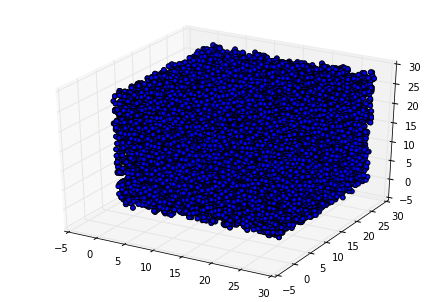

In [8]:
xyz = read_xyz(xtc)
db.fit(xyz)

plot_atoms(xyz)

In [9]:
def plot_only_clusters(model, colorize=True):
    """ Plots clusters from the model - if second argument is True, clusters
        will be colored in different ways, otherwise - all are the same.
    """
    if colorize:
        col =(lambda ml: ml[ml!=-1])(model.labels_)
    else:
        col ='b'
    return plot_atoms(model.components_, col)

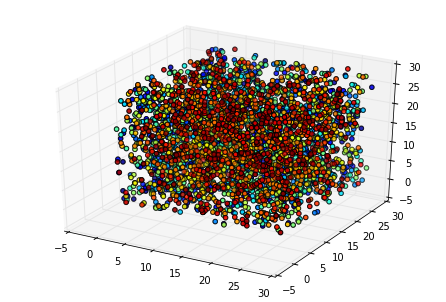

In [10]:
plot_only_clusters(db)

In [11]:
def plot_with_clusters(xyz, labels):
    """ Plots all atoms and sets to clusters points another color. """
    boolean_labels = labels != -1
    return plot_atoms(xyz, boolean_labels)

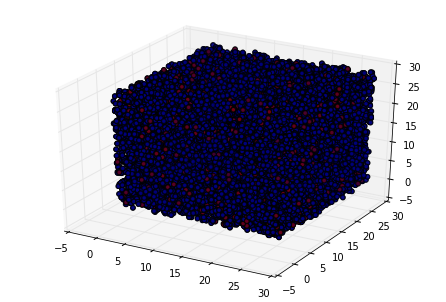

In [12]:
plot_with_clusters(xyz,db.labels_)